# test feature points
test the feature points of the roof images are stable

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
# Makes the matplotlib plots appear inline in this jupyter notebook

In [4]:
folderPath = ""
folderPath = ""
imgName = "imageStitch_down.jpg"
# subImgName = "largeTrueSub_down.jpg"
newImage = "subImage_down.jpg"
subImgName = "subImage_down.jpg"


In [5]:
def show_image(im, name=""):
        
    h,w = im.shape[:2]
    print(name, im.shape)
    plt.imshow(im, cmap='gray')
    plt.show()

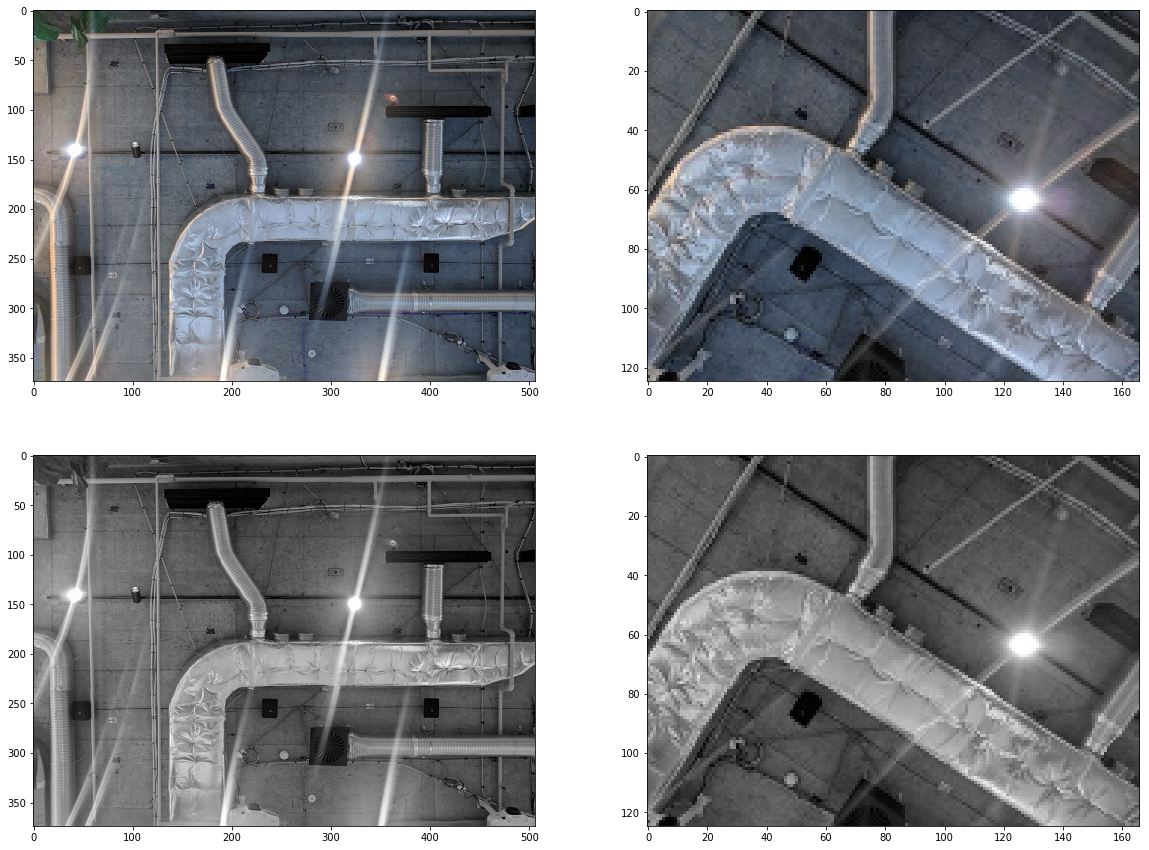

In [6]:
# resize variables
x_size, y_size = 0.5, 0.5
super_rgb   =    cv2.resize(cv2.imread(folderPath + imgName,    cv2.IMREAD_COLOR), None, fx=x_size, fy=y_size)
super_grey  =    cv2.resize(cv2.imread(folderPath + imgName,    cv2.IMREAD_GRAYSCALE), None, fx=x_size, fy=y_size)
search_rgb  =    cv2.resize(cv2.imread(folderPath + subImgName, cv2.IMREAD_COLOR), None, fx=x_size, fy=y_size)
search_grey =    cv2.resize(cv2.imread(folderPath + subImgName, cv2.IMREAD_GRAYSCALE), None, fx=x_size, fy=y_size)

plt.rcParams['figure.figsize'] = (20, 15)
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)


# fig2, ax = plt.plot(wav_t, s1)

ax1.imshow(super_rgb,cmap='gray')
ax2.imshow(search_rgb,cmap='gray')
ax3.imshow(super_grey,cmap='gray')
ax4.imshow(search_grey,cmap='gray')

# show_image(super_rgb,     "super_rgb:   Large stitched colour image")
# show_image(super_grey,    "super_grey:  Large stitched greyscale image")
# show_image(search_rgb,    "search_rgb:  Colour template image to be found")
# show_image(search_grey,   "search_grey: Greyscale template image to be found")

# show orb features in all images

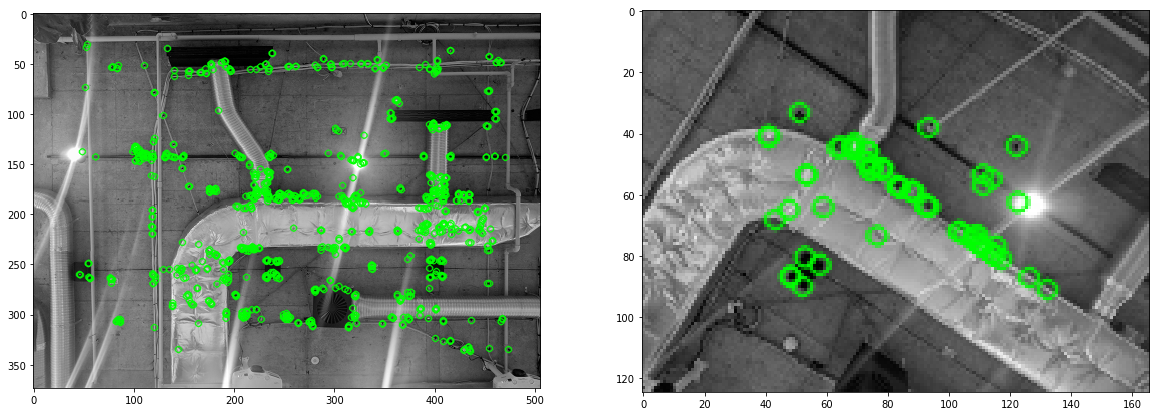

In [214]:

def add_orb(img, nfeat):
    """
    add orb features to image for showing
    """
    # Initiate ORB detector
    orb = cv2.ORB_create(nfeatures=nfeat, scoreType=cv2.ORB_FAST_SCORE)
    # find the keypoints with ORB
    kp = orb.detect(img, None)
    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    # draw only keypoints location,not size and orientation
    img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
    return img2

fig1, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
im1 = add_orb(super_grey,1000)
im2 = add_orb(search_grey,100)
ax1.imshow(im1); ax2.imshow(im2)

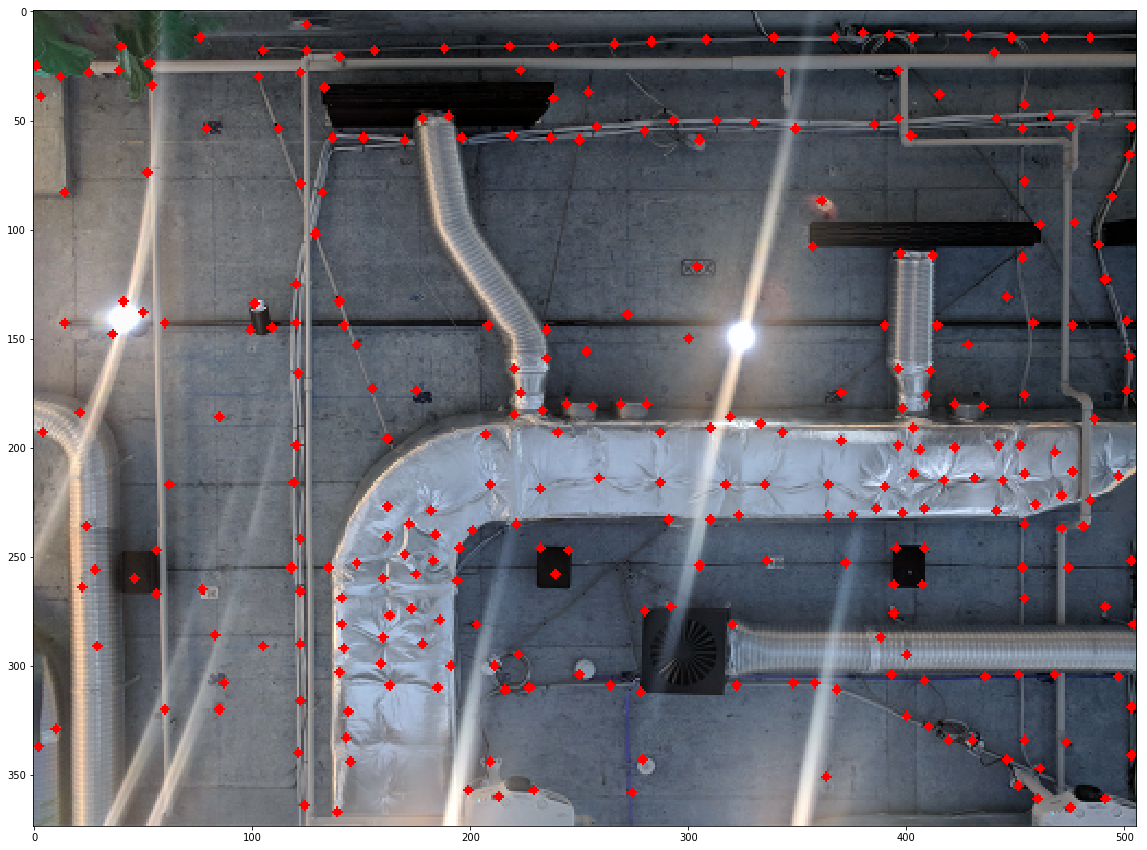

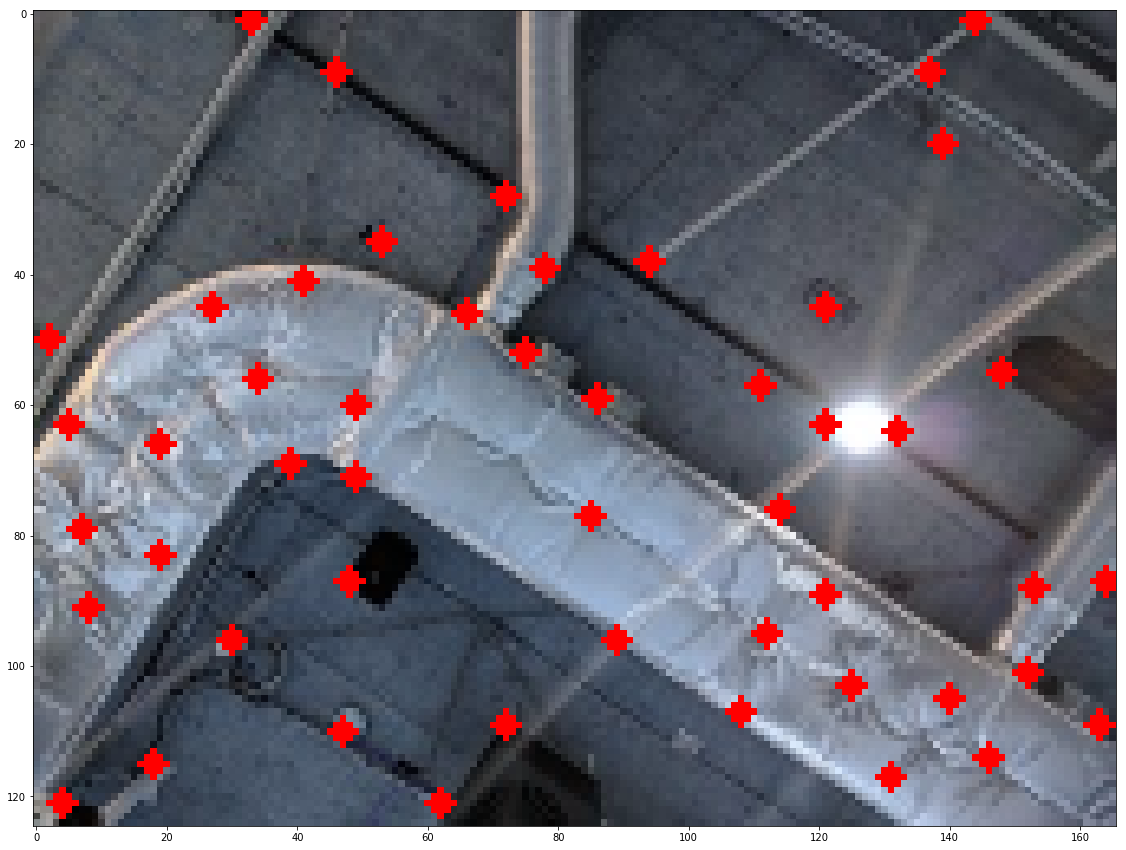

(<matplotlib.image.AxesImage at 0x256f74c2198>, None)

In [8]:
corners = cv2.goodFeaturesToTrack(super_grey,300,0.01,10)
corners = np.int0(corners)
img = super_rgb.copy()
# compute the descriptors with ORB
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2,255,-1)
plt.imshow(img), plt.show()

corners = cv2.goodFeaturesToTrack(search_grey,50,0.01,10)
corners = np.int0(corners)
img = search_rgb.copy()
# compute the descriptors with ORB
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2,255,-1)
plt.imshow(img), plt.show()

# Template Matching

This particular example doesn't work because the search image is not identical to the super image (shown), and therefore returns a result of 0 as there are no matching points (shown in the array brackets).
Location Information: (array([], dtype=int64), array([], dtype=int64))
test (374, 506)


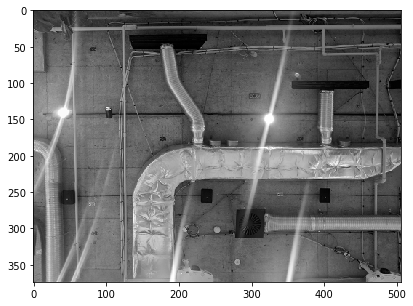

0


In [9]:
def templateMatch(img, sub_img, threshold=0.98):
    width, height = sub_img.shape[::-1]

    result = cv2.matchTemplate(img,
                               sub_img,
                               cv2.TM_CCOEFF_NORMED)
    
    
    # This particular result is using the CCOEFF NORMED matching method which is a particular operation/algorithym/mathematical 
    # equation in template matching
    loc = np.where(result >= threshold)
 
    # Location using numpy where the returned result of the match is equal to or above 0.98
    count = 0
    
    # White - setting the rgb value for white without more numbers to complicate the script 
    # count - number of times the loop is happening for the number of points in zip
    print ("Location Information:", loc)

    output_image = img.copy()
    
    #Creating a copy of the output image so the result is not overiding on the original image each time
    for pt in zip(*loc):
        # This reformats the data so that the x and y coordinates are paired up, as opposed to being in separate lists  
        # Python: cv.Rectangle(img, pt1, pt2, color, thickness=1, lineType=8, shift=0) → None
        cv2.rectangle(output_image, 
                        pt,
                        (pt[0] + width, pt[1] + height),
                        (255,255,255), 
                        thickness=2
                        )
        count +=1
    
    #Adding 1 everytime the loop happens, in this case only happens once
    show_image(output_image, name="test")
    print(count)
    
    
plt.rcParams['figure.figsize'] = (10, 5)
print ("This particular example doesn't work because the search image"
       " is not identical to the super image (shown), and therefore returns a result of 0 as there are no matching points (shown in the array brackets).")
templateMatch(super_grey, search_grey, 0.8)


In [239]:
MIN_MATCH_COUNT = 10

# img2 = cv2.imread('./whiteboardTest/wbAidenWins.jpg', 0)          # queryImage
# img1 = cv2.imread('./whiteboardTest/wbMain.jpg', 0) # trainImage
img2 = median = cv2.GaussianBlur(super_grey.copy(), (3,3),0)
img1 = cv2.GaussianBlur(search_grey.copy(), (3,3),0)
# img1 = img2[100:300,50:200]

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create(nfeatures=10000)

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [240]:
len(good)

20

In [241]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
#     M = np.linalg.inv(M)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

In [242]:
np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ])

array([[  0.,   0.],
       [  0., 124.],
       [165., 124.],
       [165.,   0.]], dtype=float32)

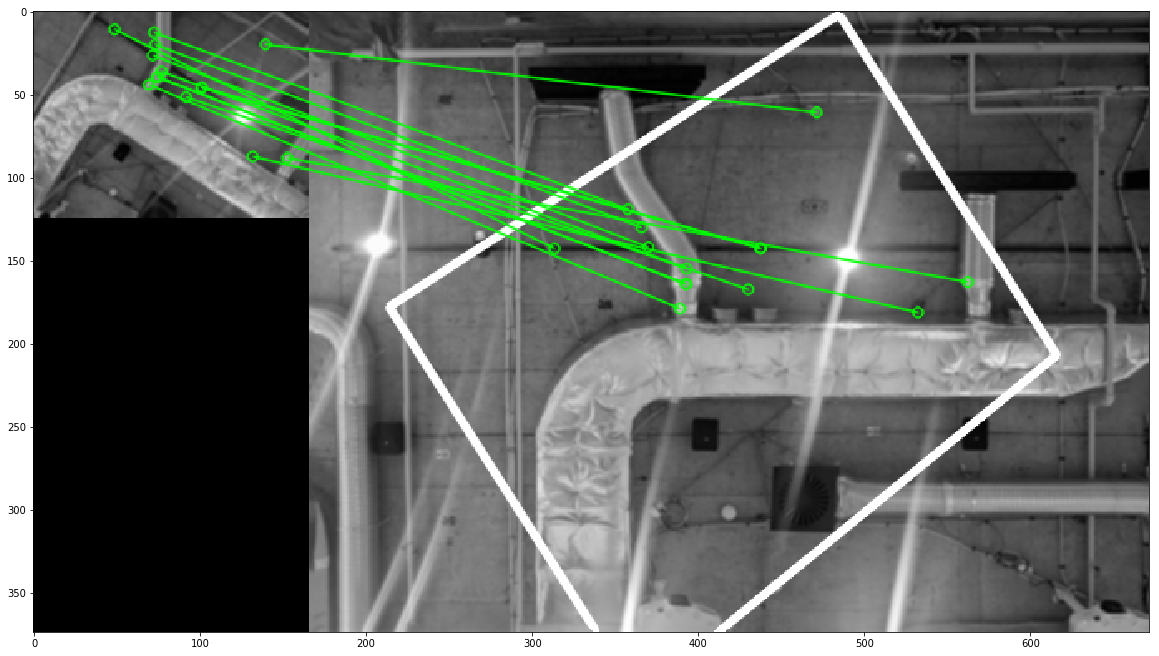

(<matplotlib.image.AxesImage at 0x256a8d39a90>, None)

In [243]:
plt.rcParams['figure.figsize'] = (20, 15)
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

In [119]:
np.abs(np.int32(dst))

array([[[669, 163]],

       [[193, 381]],

       [[348, 195]],

       [[318,  34]]])

# Do matching with ORB and brute force

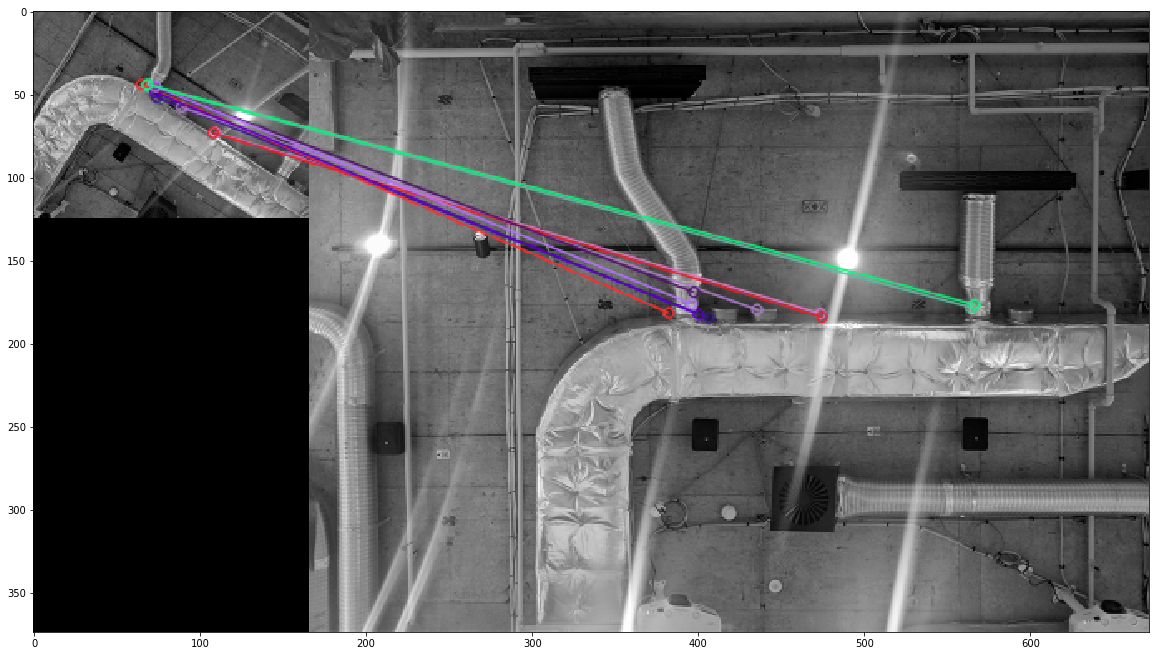

(<matplotlib.image.AxesImage at 0x256a4aba1d0>, None)

In [187]:
img2 = super_grey.copy()
img1 = search_grey.copy()

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1 = orb.detect(img1, None)
kp1, des1 = orb.compute(img1, kp1)

kp2 = orb.detect(img2, None)
kp2, des2 = orb.compute(img2, kp2)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], img3, flags=2)

plt.imshow(img3),plt.show()

# SIFT with RANSAC